In [2]:
from itertools import groupby
import json
from functools import reduce
from operator import or_

import networkx as nx
import shelve
import numpy as np
import pandas as pd
from collections import Counter
from random import choice, sample
from tqdm import tqdm
from matplotlib.pylab import plt
plt.rcParams['figure.figsize'] = [10*2.54, 8*2.54]

In [3]:
with open('../controlflowgraph_with-return.json') as f:
    graph = json.load(f)
    
with open('../100cov.json') as f:
    cov_set = set(json.load(f))

# calculate graph
G = nx.DiGraph()
G.add_edges_from([(int(u), v) for u, vs in graph.items() for v in vs['children']])

# calculate mapping from jazzer ids to nodes
jazzer_to_nodes = {id_:int(n) for n,v in graph.items() for id_ in v['jazzerids']}

# calculate mapping from nodes to jazzer ids
nodes_to_jazzer = {int(n):set(v['jazzerids']) for n,v in graph.items() if v['jazzerids']}

# calculate known ids from cfg
all_ids = set(jazzer_to_nodes.keys())
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 1303\nNumber of edges: 2417\nAverage in degree:   1.8550\nAverage out degree:   1.8550'

In [11]:
# get large component
print([len(comp) for comp in nx.weakly_connected_components(G)])
for comp in nx.weakly_connected_components(G):
    if len(comp) >200:
        break
graph = G.subgraph(comp)

[1196, 4, 6, 91, 4, 2]


In [5]:
np.array(list(dict(graph.in_degree()).values())).mean()

1.8570234113712374

In [6]:
# calculate jazzerids of the component and compare to coverage set
ids_in_comp = reduce(or_,map(lambda node: nodes_to_jazzer.get(node, set()), graph.nodes))

# all ids of the covered set that are part of the cfg are also in the component
print((cov_set&all_ids)-ids_in_comp)

print(len((cov_set&all_ids))/len(ids_in_comp))

# unfortunately many nodes are not found in the CFG
#cov_set-all_ids

set()
0.6306306306306306


In [7]:
[node for node in G.nodes if G.in_degree(node) == 0]

[1162, 1170, 1267, 1298]

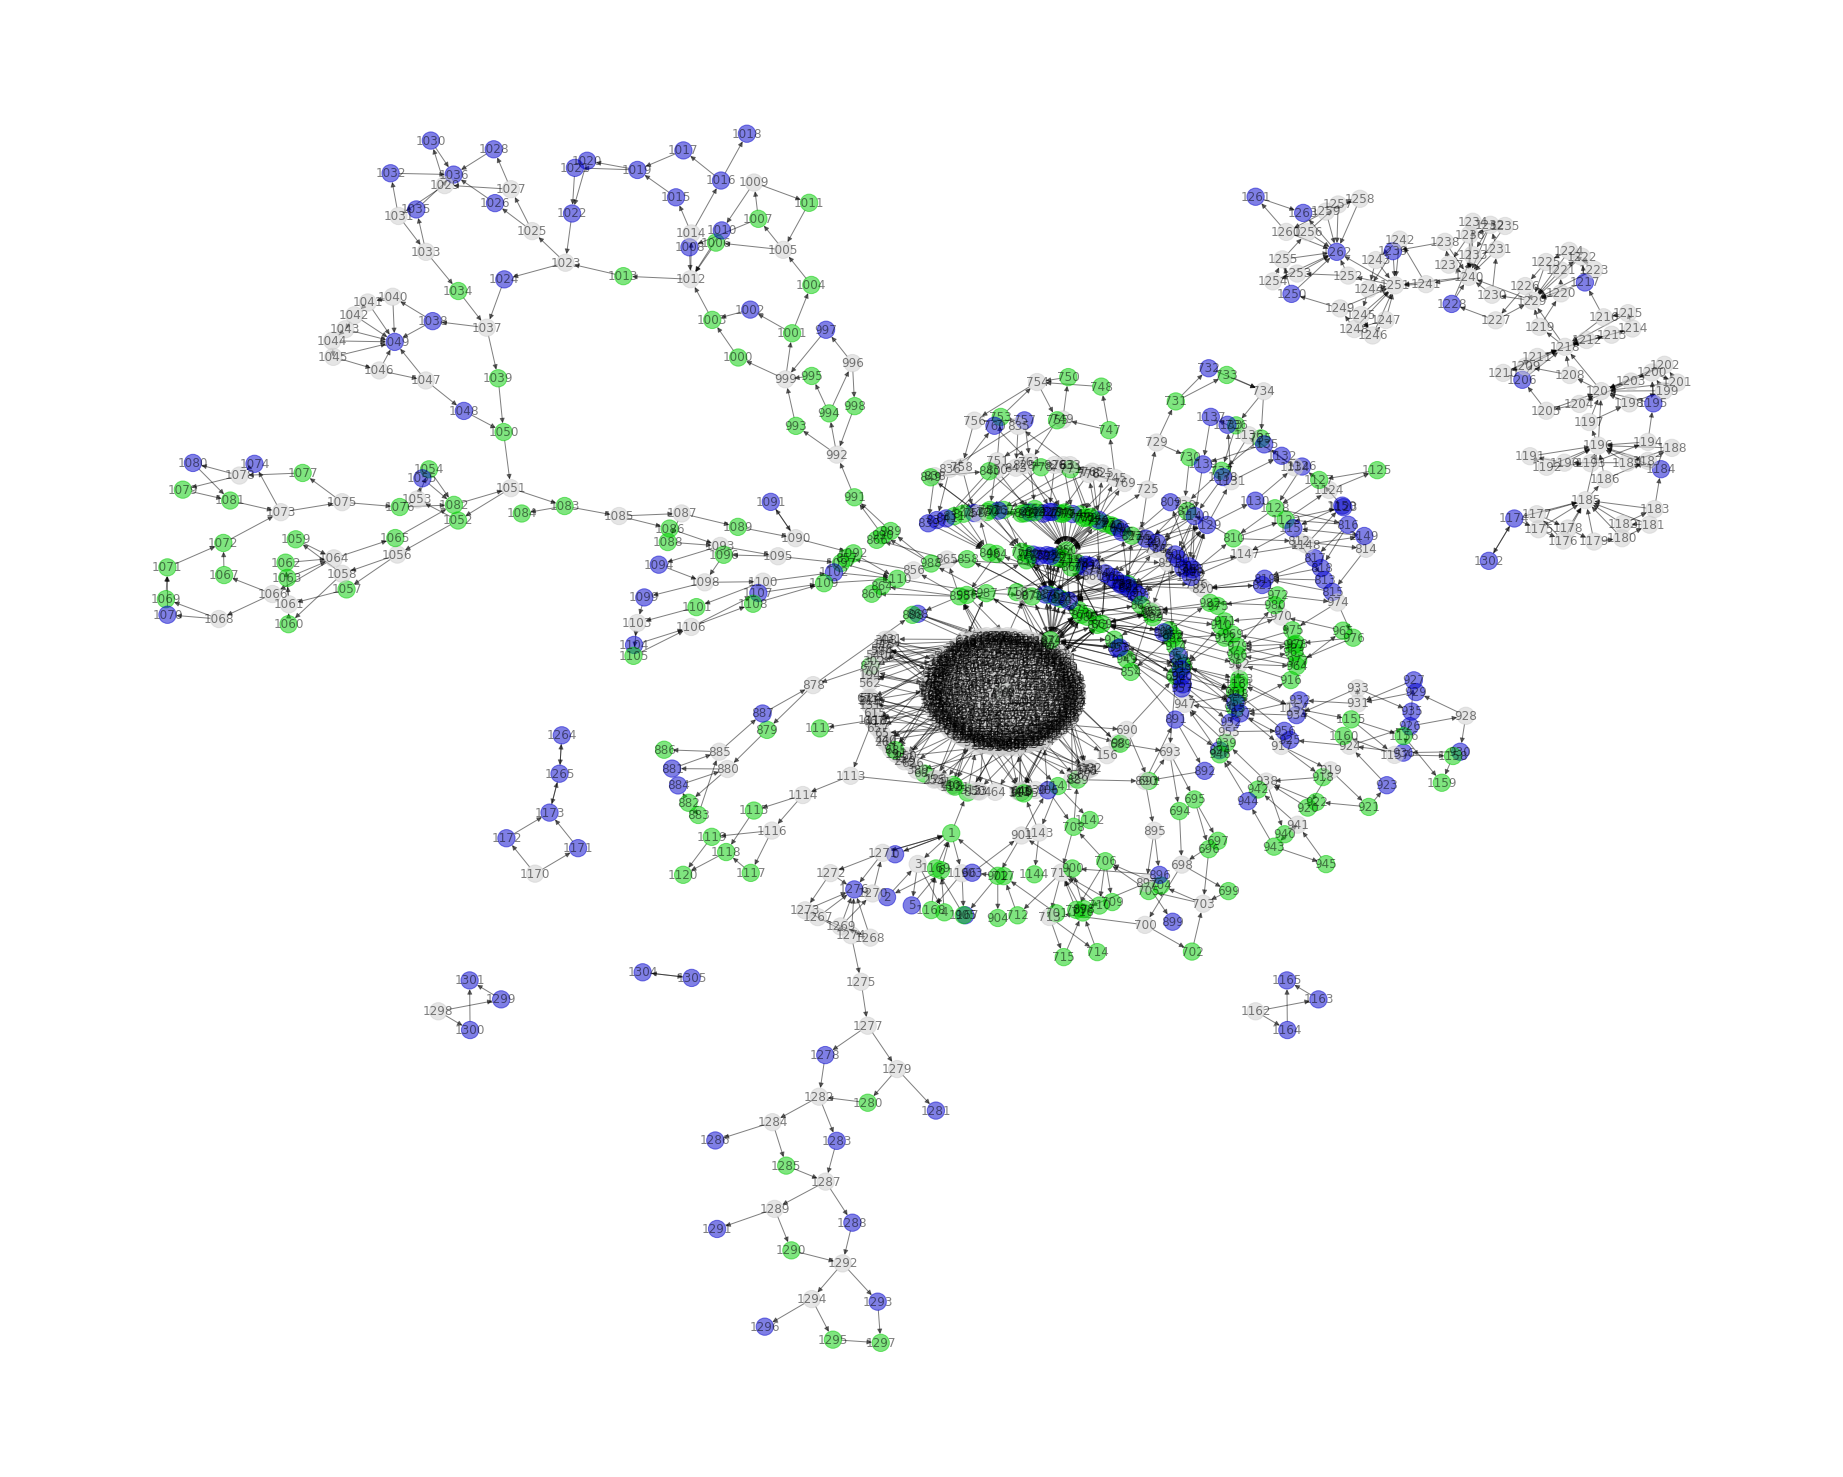

In [10]:
#gray if no ids
#red uncoverable
#blue uncovered
#green covered

nodes = list(G.nodes)[:]
G_ = G.subgraph(nodes)
nx.draw(G_, with_labels=True, alpha =.5, pos=nx.nx_pydot.graphviz_layout(G_),
        nodelist=nodes,
        node_color=['#cccccc' if n not in nodes_to_jazzer else
                    '#0000cc' if not nodes_to_jazzer[n] & cov_set else
                    '#00cc00' for n in nodes]
)

In [69]:
nodes_to_jazzer[1140],nodes_to_jazzer[1036]

({564}, {489})